# Data Analysis (final)

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from support import *
from support_damage_detection import *

## Load datasets

In [3]:
df_generated_pristine = get_VSSG_data("generated_small_u03", "pristine")
df_experimental = get_experimental_VSSG()
df_simulated_pristine = get_VSSG_data("simulated", "pristine")
df_simulated_damaged = get_damaged_VSSG_data("simulated")

df_test_numerical = pd.concat([df_simulated_pristine.sample(n=101, random_state=1),
                     df_simulated_damaged.sample(n=100, random_state=1)], ignore_index=True)

## Histograms of sensor grid data

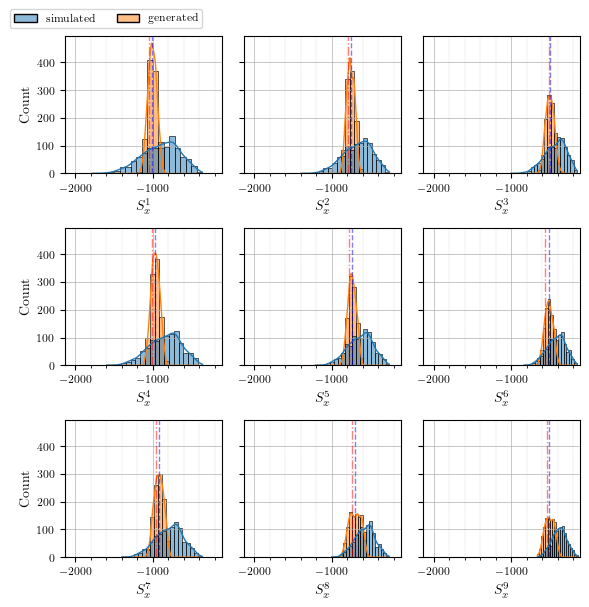

,mean_sim,std_sim,mean_gen,std_gen,delta_mean,ratio_std,div_std
H_1_1,-895.02,238.12,-1003.35,55.87,108.33,0.23,-76.54
H_1_2,-669.43,186.85,-756.67,49.64,87.24,0.27,-73.43
H_1_3,-430.57,139.62,-497.91,54.70,67.35,0.39,-60.82
H_2_1,-843.21,207.41,-964.11,54.69,120.91,0.26,-73.63
H_2_2,-632.55,159.06,-739.13,52.99,106.59,0.33,-66.69
H_2_3,-418.94,119.71,-513.31,53.76,94.36,0.45,-55.09
H_3_1,-787.59,174.04,-918.14,60.22,130.55,0.35,-65.40
H_3_2,-576.79,125.86,-699.01,74.59,122.22,0.59,-40.74
H_3_3,-379.02,93.86,-503.57,60.61,124.54,0.65,-35.43


In [5]:
# assemble data to plot histogram from
# df_generated_pristine df_gen_limited_pristine df_gen_limited_pristine_LC1
df_generated_pristine_LCX = get_VSSG_data("generated", "pristine", load_case=1)
df_combined = pd.concat([df_simulated_pristine, df_generated_pristine_LCX.sample(n=1000, random_state=0)], ignore_index=True)

# plot histogram with desired settings
df_stats = plot_sensor_grid_histograms(df_combined, 
                            hue='source',
                            direction='desc_x',
                            y_lim_max=None,
                            bins=20,
                            equal_bin_axis=True,
                            add_vert_line_OLC_data=True,
                            add_vert_line_gen_sample=1,
                            save_figure=False,
                            fn_extension="comp_sim_gen_OLC1_idx1",
                            title=None)
df_stats

In [6]:
df_simulated_pristine.loc[df_simulated_pristine["loadcase"] == 1]

,loadcase,damage_label,damage_state,source,V_1_1,V_2_1,V_3_1,V_1_2,V_2_2,V_3_2,V_1_3,V_2_3,V_3_3,H_1_1,H_1_2,H_1_3,H_2_1,H_2_2,H_2_3,H_3_1,H_3_2,H_3_3,VH_1_1,VH_1_2,VH_1_3,VH_2_1,VH_2_2,VH_2_3,VH_3_1,VH_3_2,VH_3_3
111,1,0,pristine,simulated,291.964282,230.167236,167.16004,173.269024,186.586007,215.05794,8.149319,105.874638,232.721027,-1003.418951,-757.465477,-498.723592,-964.750228,-740.989652,-515.818395,-920.611493,-702.206132,-505.801452,-72.806971,46.333672,141.661652,-46.870242,107.232996,243.213012,-55.700243,152.510427,361.828998


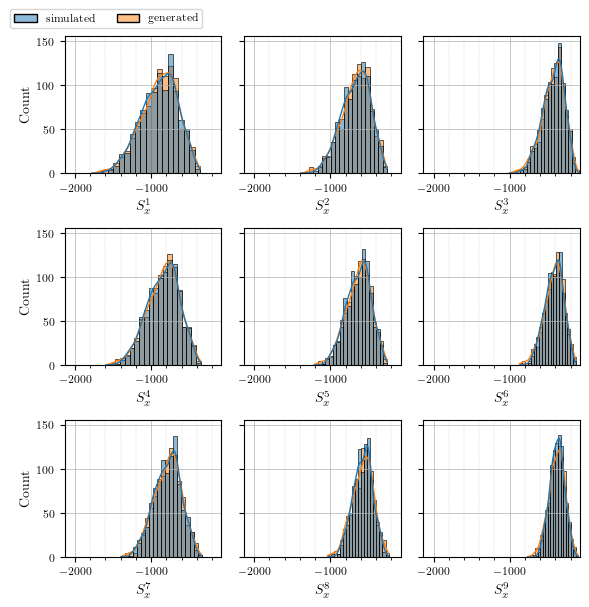

,mean_sim,std_sim,mean_gen,std_gen,delta_mean,ratio_std,div_std
H_1_1,-895.02,238.12,-891.47,241.62,-3.55,1.01,1.47
H_1_2,-669.43,186.85,-667.96,191.48,-1.47,1.02,2.48
H_1_3,-430.57,139.62,-431.00,148.48,0.43,1.06,6.34
H_2_1,-843.21,207.41,-840.79,212.49,-2.41,1.02,2.45
H_2_2,-632.55,159.06,-631.80,165.52,-0.74,1.04,4.06
H_2_3,-418.94,119.71,-419.32,129.54,0.37,1.08,8.21
H_3_1,-787.59,174.04,-786.13,180.70,-1.45,1.04,3.83
H_3_2,-576.79,125.86,-577.12,140.08,0.33,1.11,11.30
H_3_3,-379.02,93.86,-381.15,106.46,2.13,1.13,13.42


In [7]:
# assemble data to plot histogram from
df_combined = pd.concat([df_simulated_pristine, df_generated_pristine.sample(n=1000, random_state=0)], ignore_index=True)

# plot histogram with desired settings
df_stats = plot_sensor_grid_histograms(df_combined, 
                            hue='source',
                            direction='desc_x',
                            y_lim_max=None,
                            bins=20,
                            equal_bin_axis=True,
                            add_vert_line_OLC_data=False,
                            add_vert_line_gen_sample=None,
                            save_figure=False,
                            fn_extension="ALL_LCs_gen",
                            title=None)
df_stats

#### Histogram pristine vs. damaged

df_simulated_DSX: (250, 34)
df_simulated_DSY: (250, 34)
df_simulated_pristine: (1000, 31)


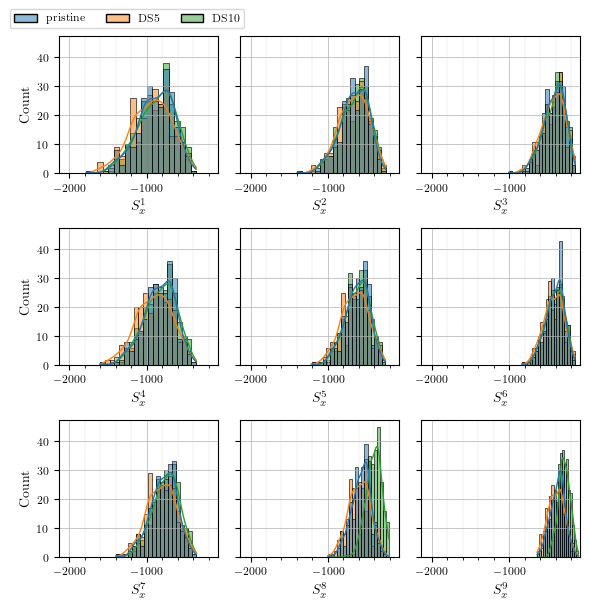

,mean_pristine,std_pristine,mean_DS5,std_DS5,mean_DS10,std_DS10
H_1_1,-889.74,232.96,-939.36,251.62,-874.25,239.42
H_1_2,-662.58,183.56,-670.16,189.95,-652.34,189.69
H_1_3,-421.65,139.32,-431.28,146.16,-418.98,144.17
H_2_1,-837.68,202.06,-902.63,228.56,-828.24,209.99
H_2_2,-625.29,154.90,-653.42,170.55,-617.50,159.98
H_2_3,-409.13,117.29,-425.35,127.76,-410.74,122.61
H_3_1,-782.08,169.26,-808.63,184.53,-753.95,170.75
H_3_2,-569.80,122.39,-592.01,135.69,-406.87,98.20
H_3_3,-369.97,92.19,-388.73,102.35,-287.70,73.82


In [8]:
df_simulated_DSX = get_VSSG_data("simulated", "DS5")
df_simulated_DSY = get_VSSG_data("simulated", "DS10")
print(f"df_simulated_DSX: {df_simulated_DSX.shape}")
print(f"df_simulated_DSY: {df_simulated_DSY.shape}")
print(f"df_simulated_pristine: {df_simulated_pristine.shape}")

# assemble data to plot histogram from
df_combined = pd.concat([df_simulated_pristine.sample(n=250, random_state=1),
                         df_simulated_DSX,
                         df_simulated_DSY], ignore_index=True)

# plot histogram with desired settings
df_stats = plot_sensor_grid_histograms(df_combined, 
                            hue='damage_state',
                            direction='desc_x',
                            y_lim_max=None,
                            bins=20,
                            equal_bin_axis=True,
                            save_figure=False,
                            fn_extension="simDS5vsDS10",
                            title=None)
df_stats

## Single loadcase plots of raw data

Comparison of different damages and different loadcases to the correponding pristine samples.

D:\Masters_Thesis\work\notebooks\support.py:380: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, idx].set_xticklabels(formatted_lables)
D:\Masters_Thesis\work\notebooks\support.py:380: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, idx].set_xticklabels(formatted_lables)
D:\Masters_Thesis\work\notebooks\support.py:380: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, idx].set_xticklabels(formatted_lables)


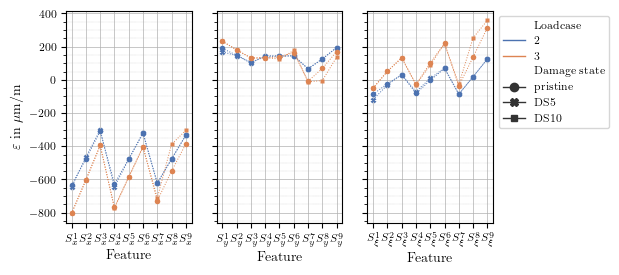

In [5]:
df_simulated_DSX = get_VSSG_data("simulated", "DS5")
df_simulated_DSY = get_VSSG_data("simulated", "DS10")
df_exp_pristine_LC814 = df_experimental[(df_experimental["loadcase"] == 814) & (df_experimental["damage_state"] == "pristine")]

df_combined = pd.concat([df_simulated_pristine[df_simulated_pristine["loadcase"] == 2],
                         df_simulated_pristine[df_simulated_pristine["loadcase"] == 3],
                         df_simulated_DSX[df_simulated_DSX["loadcase"] == 2],
                         df_simulated_DSY[df_simulated_DSY["loadcase"] == 3]], ignore_index=True)

sns_plot_single_LC_sensor_strain(df_combined, hue="loadcase", mark="damage_state", direction=None,
                                 ylabel=r"$\varepsilon$ in $\mu$m/m",
                                 alpha=1.0, linewidth=0.7, markersize=4,
                                 figure_width_cm=14,
                                 figure_height_cm=7,
                                 save_figure=True,
                                 fn_extension="numericalComp_DS5LC2_DS10LC3")

* Visualization of experimental data, together with the range of numerical, generated, pristine data
* One example loadcase for experimental data

D:\Masters_Thesis\work\notebooks\support.py:380: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, idx].set_xticklabels(formatted_lables)
D:\Masters_Thesis\work\notebooks\support.py:380: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, idx].set_xticklabels(formatted_lables)
D:\Masters_Thesis\work\notebooks\support.py:380: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, idx].set_xticklabels(formatted_lables)


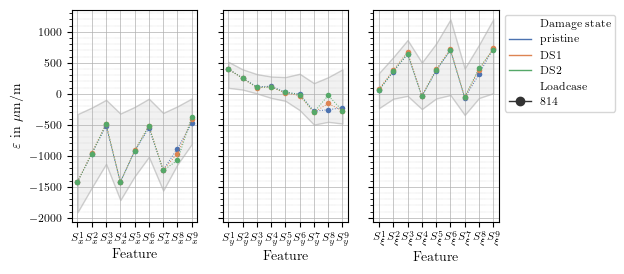

In [10]:
df_exp_pristine_LC814 = df_experimental[(df_experimental["loadcase"] == 814) & (df_experimental["damage_state"] == "pristine")]
df_exp_pristine_LC814_DS1 = df_experimental[(df_experimental["loadcase"] == 814) & (df_experimental["damage_state"] == "DS1")]
df_exp_pristine_LC814_DS2 = df_experimental[(df_experimental["loadcase"] == 814) & (df_experimental["damage_state"] == "DS2")]

df_combined = pd.concat([df_exp_pristine_LC814,
                         df_exp_pristine_LC814_DS1,
                         df_exp_pristine_LC814_DS2], ignore_index=True)
# get range of generated data
feature_names = [col for col in df_simulated_pristine.columns if 'H_' in col or 'V_' in col or 'VH_' in col]
fill_min_max = {"min": df_generated_pristine[feature_names].min(),
                "max": df_generated_pristine[feature_names].max()}

sns_plot_single_LC_sensor_strain(df_combined, hue="damage_state", mark="loadcase", direction=None,
                                 ylabel=r"$\varepsilon$ in $\mu$m/m",
                                 alpha=1.0, linewidth=0.7, markersize=4,
                                 fill_min_max=fill_min_max,
                                 figure_width_cm=14,
                                 figure_height_cm=7,
                                 save_figure=True,
                                 fn_extension="experimental_LC814_wFill")